# Importando base de dados

In [1]:
import pandas as pd

total_bill: valor total da conta paga pelo cliente

tip: valor da gorjeta em si

dessert: se a pessoa pediu sobremesa ou não

day: dia da semana

time: horário de almoço ou horário de jantar

size: quantidade de clientes na mesa

In [2]:
pd.read_csv('dados/tips_atualizado.csv')

,total_bill,tip,dessert,day,time,size
0,16.990000,1.010000,No,Sun,Dinner,2
1,10.340000,1.660000,No,Sun,Dinner,3
2,21.010000,3.500000,No,Sun,Dinner,3
3,23.680000,3.310000,No,Sun,Dinner,2
4,24.590000,3.610000,No,Sun,Dinner,4
...,...,...,...,...,...,...
3411,26.330845,4.729032,No,Sat,Dinner,3
3412,25.531567,1.604021,Yes,Sat,Dinner,2
3413,21.547132,1.733914,Yes,Sat,Dinner,2
3414,18.966233,1.718951,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('dados/tips_atualizado.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

Nesta etapa, faremos a tradução as colunas e campos da língua inglesa para portuguesa.

É necessário que haja uma análise para avaliar se de fato este processo é relevante ou não para nosso projeto. Como nossa exploração de dados se dará de forma didática, é realmente importante traduzir.

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

Na célula seguinte, criaremos uma lista chamada renomear igual a chave e o valor de cada uma das colunas. Copiaremos o conteúdo dos colchetes de Index() e colaremos dentro das chaves de renomear, separando cada coluna em uma linha.

Em cada linha, passaremos o valor que queremos renomear com a tradução entre aspas simples para cada ocorrência.

In [6]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

Para que nosso entendimento seja facilitado, não chamaremos mais a variável dados por este nome, e atribuiremos todo o conteúdo de dados. Como se trata de um DataFrame, passamos para a nova variável gorjetas, sendo igual a dados.rename() recebendo as colunas columns igual a renomear.

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


Porém, os conteúdos dos campos continuam em inglês, como a sobremesa contendo "No" ou "Yes" e hora_do_dia com "Dinner" ou "Lunch", por exemplo.

Começaremos com sobremesa utilizando gorjetas.sobremesa, o qual é um tipo categórico de "sim" ou "não". Para visualizarmos todos os tipos que aparecem para este campo, inserimos o comando .unique() à sentença.

In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

Assim, recebemos o retorno com os conteúdos 'No', 'Yes' possíveis para este campo em específico. Copiaremos este mesmo conteúdo e criaremos uma lista do tipo sim_nao sendo igual a 'No', 'Yes'. Em seguida, utilizaremos : para fazer a tradução da mesma forma como fizemos para cada coluna anteriormente.

In [11]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

Agora, precisaremos mapear todos os gorjetas.sobremesa para "Sim" e "Não" utilizando o comando map() recebendo o valor sim_nao.

In [12]:
gorjetas.sobremesa.map(sim_nao)

0       Não
1       Não
2       Não
3       Não
4       Não
       ... 
3411    Não
3412    Sim
3413    Sim
3414    Não
3415    Não
Name: sobremesa, Length: 3416, dtype: object

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


Executando, o sistema apresentará toda a coluna sobremesa com seus conteúdos ordenados pelo índice. Para ver se a alteração foi realizada com sucesso, escreveremos gorjetas.head(1).

Feito isso, a resposta para este campo continua como "No" em inglês; isso acontece porque não atribuímos este mapa para nossa variável gorjetas. Logo, escreveremos que gorjetas.sobremesa é igual a gorjetas.sobremesa.map(sim_nao).

In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [15]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


# Importando o Seaborn

Queremos gerar gráficos estatísticos para conseguirmos entender melhor o ponto das gorjetas.

Nossa primeira análise verifica se de fato o valor da conta influencia no valor da caixinha. Primeiro, importaremos a nova biblioteca chamada Seaborn; toda feita em Python, é criada para desenhar os gráficos estatísticos que permite a exploração da distribuição de dados.

Há uma biblioteca bastante conhecida chamada MatPlotlib, a qual gera visualizações bastante interessantes, mas para que sejam sofisticadas, é necessário inserir uma grande quantidade de código. Porém, apesar de ser em Python, não foi criada para trabalhar com o Pandas, pois surgiu dez anos antes deste.

Em nosso projeto, utilizamos o tipo DataFrame como vimos anteriormente. O Seaborn surgiu neste contexto, para que possa trabalhar com DataFrame em um código bem mais enxuto de maior nível.

O Seaborn que importaremos é uma API feita com base no MatPlotlib para plotagem de dados, geração de visualizações e gráficos estatísticos, além de ser em Python.

Começaremos adicionando uma célula de texto com "# Importando o Seaborn". Para realizar a importação, utilizaremos !pip install seguido de seaborn, passando a versão 0.9.0 que queremos com ==.

In [24]:
!pip install seaborn==0.9.0

In [25]:
import seaborn as sns

In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\joaoe\anaconda3\lib\site-packages
Requires: numpy, pandas, matplotlib, scipy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

Começaremos nossa primeira análise relembrando quais são as nossas colunas escrevendo gorjeta.columns. Geraremos um gráfico estatístico a partir dos valores das colunas valor_da_conta e gorjeta, verificando se seu aumento ou diminuição são proporcionais.

Chamaremos o Seaborn por sns e geraremos este primeiro gráfico com scatterplot(), o qual receberá três parâmetros: x referente ao valor do eixo 'valor_da_conta', y para 'gorjeta' e a base de dados data-gorjetas que estamos utilizando.

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

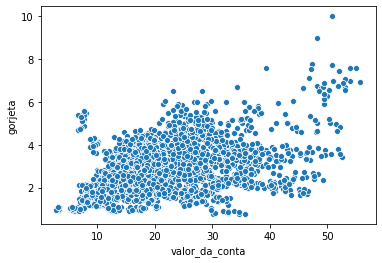

In [28]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [29]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 3416 registros 

Registros não nulos


valor_da_conta      3416
gorjeta             3416
sobremesa           3416
dia_da_semana       3416
hora_do_dia         3416
total_de_pessoas    3416
dtype: int64

## Criando o campo porcentagem

Visualmente, percebemos em nosso primeiro gráfico que o valor da gorjeta sobe conforme o valor total da conta aumenta. Neste passo, veremos se estes valores são proporcionais.

Através do comando gorjetas.head(1), veremos as colunas de nosso projeto. Para criar um novo campo deste cálculo, inseriremos gorjetas[] passando o nome 'porcentagem'. Este será formado por gorjetas['gorjeta'] dividido com / por gorjetas['valor_da_conta'].



In [30]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [31]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [32]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


Através do comando gorjetas.head(1), veremos as colunas de nosso projeto. Para criar um novo campo deste cálculo, inseriremos gorjetas[] passando o nome 'porcentagem'. Este será formado por gorjetas['gorjeta'] dividido com / por gorjetas['valor_da_conta'].

In [33]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [34]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


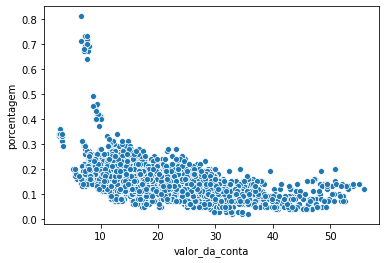

In [35]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas )

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

Até este momento, fizemos observações interessantes com duas visualizações em gráficos estatísticos: uma chamada valor_gorjeta para vermos os valores da conta e da gorjeta, e outra porcentagem_conta das contas com as porcentagens para atestar se os valores são proporcionais. Em ambas, utilizamos scatterplot().

Neste passo, aprenderemos a gerar outra visualização dos mesmos recursos de forma diferente, como um gráfico em formato de linha.

Armazenaremos este gráfico em uma nova variável chamada porcentagem_conta_linha, mas utilizaremos o comando relplot() passando os mesmos eixos x='valor_da_conta' e y='porcentagem' aplicados no gráfico porcentagem_conta.

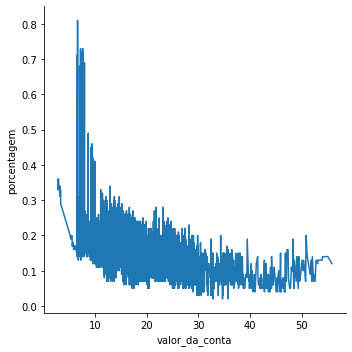

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

Assim teremos este mesmo gráfico na versão em linha. Visualmente a proporção não é linear, pois parece que a porcentagem diminui conforme o valor da conta aumenta mas com oscilações.

Para visualizarmos a progressão que estamos tendo, escreveremos apenas o comando sns.lmplot() recebendo os mesmos eixos, sem necessidade de armazenar em uma variável própria.

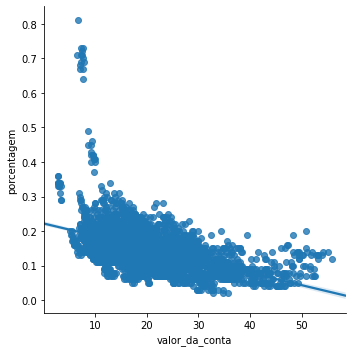

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

Com este gráfico, poderemos ver que realmente o valor da porcentagem tende a diminuir com o aumento do valor total da conta.

# Análise 2 - Sobremesa

Finalizamos nossa primeira análise e vimos que o valor da conta influencia no valor da gorjeta, mas não de maneira proporcional.

Agora, como nossa segunda análise, verificaremos se a sobremesa interfere ou não no valor da gorjeta. 

In [38]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [39]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


Assim poderemos visualizar quantos pedidos atendem esta chamada. Dos 244 registros, há 93 que pediram a sobremesa na linha de "count". Na linha seguinte, veremos "mean" que corresponde à média de dos valores de cada campo. Em seguida, temos o desvio padrão em "std", o valor mínimo em "min" e o máximo em "max".

In [40]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


Com isso, poderemos ver que 151 registros pediram o item, e que a média do valor da conta e da gorjeta são menores em relação à descrição anterior, mesmo que bastante próximas. Também compararemos as linhas de valores máximos e mínimos.

Nesta etapa, geraremos alguns gráficos para conseguirmos saber se de fato o valor da gorjeta é influenciado com o pedido da sobremesa ou não.

O primeiro será um gráfico categórico de "sim" ou "não" colocando todos os pontos dos clientes que pediram e dos que não pediram este item, em comparação com o valor da gorjeta em dois eixos x e y. Desta forma, poderemos visualizar melhor essa questão.

Para criar, chamaremos o Seaborn com sns seguido de catplot(). Dentro deste, passaremos o eixo x='sobremesa' e y='gorjeta', finalizando com data=gorjetas.

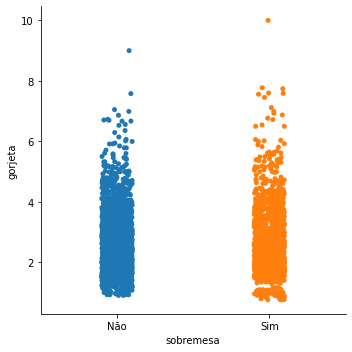

In [41]:
sns.catplot(x='sobremesa', y='gorjeta',data=gorjetas)

Poderemos ver que o valor de gorjeta mais alto está no grupo que pediu a sobremesa. Para validar, iremos à tabela de descrição das ocorrências de Sim para o campo sobremesa e veremos que o valor máximo de gorjeta foi de $10 conforme o campo de "max". Enquanto do grupo que não pediu, o valor máximo está em $9, o que confirmará os dados do gráfico.

Porém, ainda não conseguiremos identificar e afirmar que a sobremesa influencia diretamente no valor da gorjeta; é possível ver que há diferenças, mas a resposta não é exata.

Para fazermos esta confirmação, geraremos um segundo gráfico que nos permitirá comprovar essa questão por meio de tonalidades diferentes para cada grupo.

Chamaremos a classe do Seaborn com sns seguido de relplot(). Passaremos x=valor_da_conta e y='gorjeta que irá mostrar um aumento conforme vimos anteriormente. Depois, adicionaremos um novo parâmetro hue do tipo 'sobremesa' e finalizaremos com data=gorjetas.

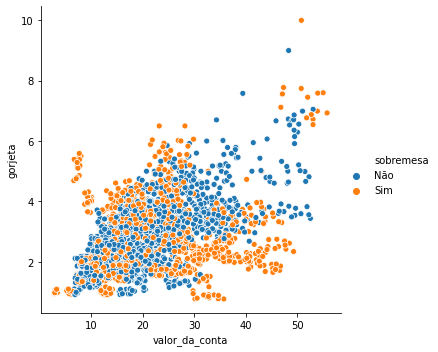

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

Analisando este gráfico, poderemos visualizar que os pontos de "não" possuem uma distribuição mais linear do que os de "sim", os quais aparentam mais espaçamento sem grande linearidade.

Criaremos este mesmo gráfico em duas colunas para cada grupo. Copiaremos e colaremos a mesma sentença anterior, passando um quarto parâmetro col igual a 'sobremesa'.

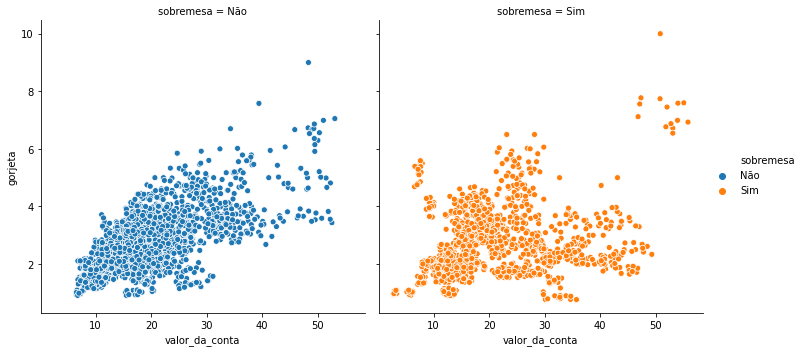

In [43]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

No primeiro gráfico de tonalidades, tínhamos todos os plots na mesma categoria, e neste último temos cada plot em um gráfico diferente legendado.

Com isso, poderemos ver melhor a questão de linearidade de cada caso. Se removermos o parâmetro hue, os gráficos serão feitos de uma única cor. É por meio dos parâmetros que realizamos as edições visuais também.

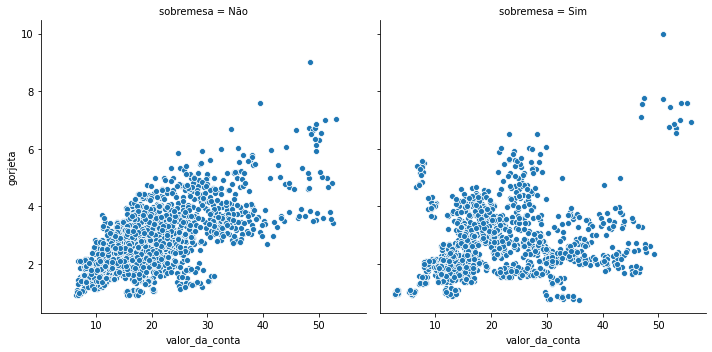

In [44]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='sobremesa', data=gorjetas)

Se quisermos traçar uma linha que permite uma visualização mais clara da situação, utilizaremos o lmplot() já citado, passando os eixos x e y como 'valor_da_conta' e 'gorjeta' respectivamente, separando os dois grupos com col em tonalidades hue e finalizando com data=gorjetas.

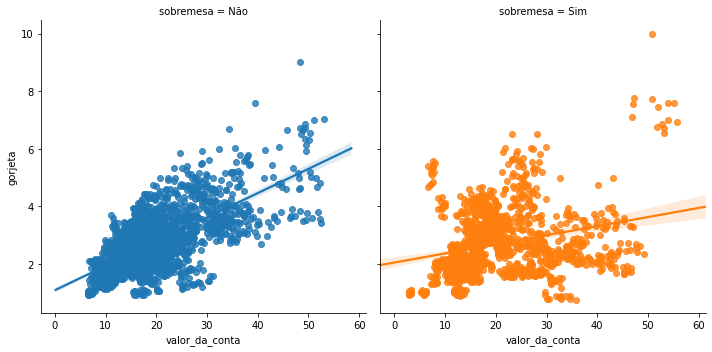

In [45]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

Com isso, poderemos ver que existe uma diferença de fato; visualmente, identificaremos que aqueles que pediram sobremesa possuem a distribuição diferente em comparação aos que não pediram.

Agora, precisaremos constatar se os dois casos realmente influenciam no valor da gorjeta. Isso só será possível através de um cálculo estatístico.

Antes, geraremos mais um gráfico; estamos sempre utilizando um valor da conta e outro de gorjeta, e sabemos que quando um aumenta o outro também aumenta, ainda que sem uma proporção exata. Copiaremos a última sentença escrita e colaremos na célula seguinte, substituindo 'gorjeta' por 'porcentagem' no eixo y.

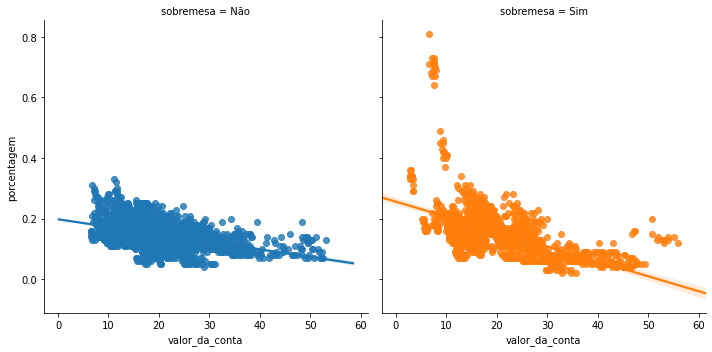

In [46]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

Desta forma, conseguiremos visualizar que o grupo que não pediu sobremesa possuirá uma linha mais horizontal, enquanto os que pediram apresentará maior inclinação da linha.


Em todos os gráficos, utilizamos pontos e linhas. Mas em relplot() há um parâmetro capaz de transformar totalmente em linhas com uso, chamado kind do tipo 'line'.

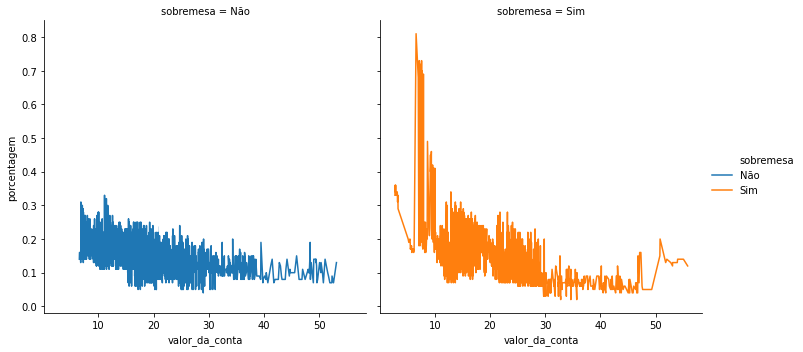

In [47]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de hipótese

Neste passo, descobriremos se a população geral que consome a sobremesa e a que não consome se comportam igual ou diferentemente da amostra através de testes de hipótese.

Nossa hipótese nula pressupõe que a distribuição da gorjeta é igual nos dois grupos. Na mesma célula, adicionamos a descrição da hipótese: "A distribuição da taxa da gorjeta é a mesma nos dois grupos". Lembramos que este conteúdo foi visto no curso de Estatística II.

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

Para realizarmos nosso teste de hipóteses, importaremos a biblioteca Ranksums a partir de scipy.stats

In [48]:
from scipy.stats import ranksums

Agora, traremos o valor da porcentagem de todas as pessoas que pediram a sobremesa a partir da montagem de uma query. Na célula seguinte, escreveremos gorjetas.query() recebendo sobremesa sendo == a 'Sim entre aspas. Lembramos que o Sim e Não devem estar escritos exatamente como implementamos na base de dados. Em seguida, adicionamos porcentagem que queremos verificar.O sistema retorna uma lista com todos os valores relativos ao nosso comando. Para deixarmos mais legível, atribuiremos todo o resultado da query em uma variável sobremesa.

In [49]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [50]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

Agora que já temos os dois grupos para nossa análise, verificaremos as hipóteses através de ranksums(), passando os dois grupos

In [51]:
r = ranksums(sobremesa, sem_sobremesa)

Por enquanto, a resposta que nos importará é o pvalue de arredondados 0.52, o que significará que, apesar de os dois grupos terem dado gorjetas de valores diferentes entre si, a diferença é insignificante do ponto de vista matemático. Ou seja, não poderemos dizer que a população geral será diferente também.

Cientes disso, continuaremos somente com nossa hipótese nula, não aceitando mais a hipótese alternativa. Para aceitarmos esta última, o valor de pvalue deveria ser igual ou menor do que 0.05. Como nosso resultado foi maior do que isso, poderemos descartar esta hipótese alternativa.

Para melhorarmos a exibição em nosso relatório, atribuiremos este valor em uma variável r e geraremos um registro com print(), recebendo 'o valor do p-value é {} seguido de format(r.pvalue).

In [52]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.033144013617673405


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

á realizamos a análise do valor da conta em relação à gorjeta e a que envolve o pedido ou não de sobremesa em relação à gorjeta.

Nesta etapa, a terceira análise dirá respeito aos dias da semana e suas relações com as gorjetas.

In [53]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


Queremos verificar quais são os dias da semana registrados neste campo através de gorjetas.dia_da_semana.unique().

O sistema responde com um array() contendo 'Domingo', 'Sábado', 'Quinta' e 'Sexta' em nossa base de dados. Agora, criaremos o primeiro gráfico pegando o valor da conta, para que possamos ver se há algum dia da semana em que as pessoas gastam mais ao final.

Para criar este plot categórico, chamaremos sns.catplot() passando o 'dia_da_semana' como eixo x e 'valor_da_conta' como eixo y. Finalizaremos passando o data=gorjetas.

In [54]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

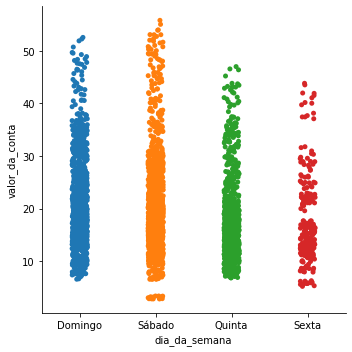

In [55]:
sns.catplot(x='dia_da_semana',y='valor_da_conta', data=gorjetas)

Visualmente, quinta e sextas são os dias que as pessoas menos gastam no restaurante, enquanto sábado e domingo apresentam os maiores valores da conta.

Faremos outro plot relacionando o valor da conta com os dias da semana, mas unindo os dados em um único gráfico com relplot() recebendo 'valor_da_conta' como eixo x, 'gorjeta' como eixo y, propriedade hue para tonalidades diferentes e data=gorjetas.

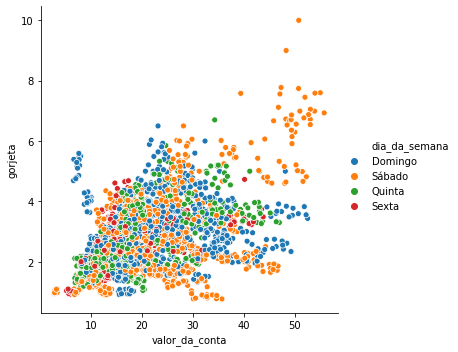

In [56]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

Com este gráfico, veremos que os valores da gorjeta são um pouco menor nas sextas e quintas, e são maiores aos sábados e domingos.

Poderemos ver as mesmas informações com 'porcentagem' sendo o eixo y, melhorando nossa capacidade de avaliação do caso.

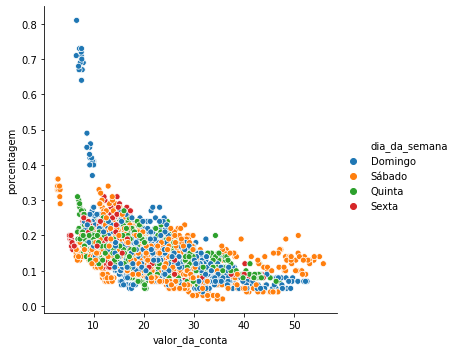

In [57]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

Para melhor visualização, separaremos cada dia da semana com os dois plots feitos, relacionados com valor da gorjeta, valor da conta e porcentagem.

Chamaremos sns para relplot() que receberá x='valor_da_conta', y='gorjeta', hue='dia_da_semana'. Para termos esta separação, passamos a já conhecida propriedade col='dia_da_semana', finalizando com nosso DataFrame.

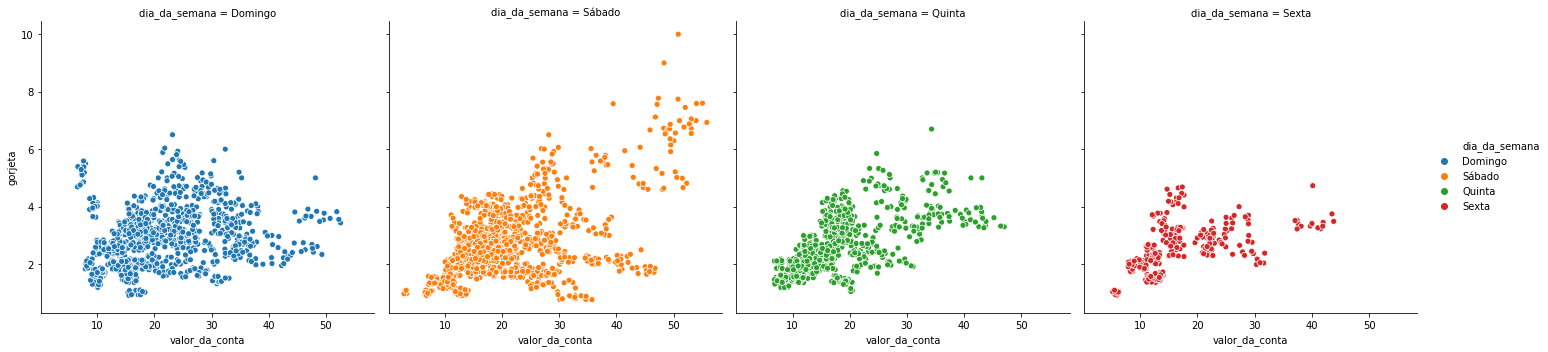

In [58]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Visualmente, poderemos reparar que realmente quinta, sábado e domingo são os dias com mais pessoas no restaurante.

Em seguida, geraremos um novo gráfico com estas mesmas propriedades, substituindo o eixo y por 'porcentagem'.

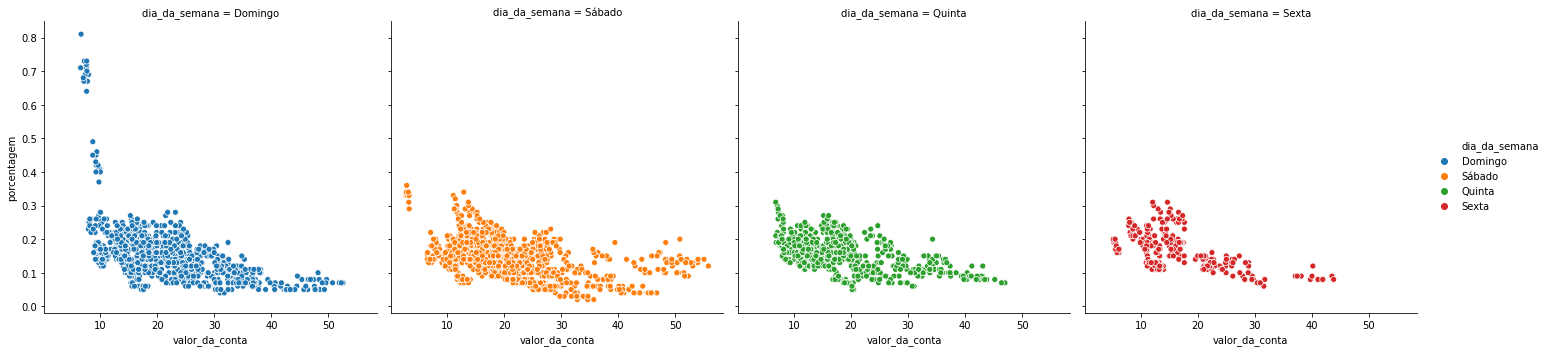

In [59]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Visualmente, poderemos reparar que realmente quinta, sábado e domingo são os dias com mais pessoas no restaurante.

Em seguida, geraremos um novo gráfico com estas mesmas propriedades, substituindo o eixo y por 'porcentagem'.

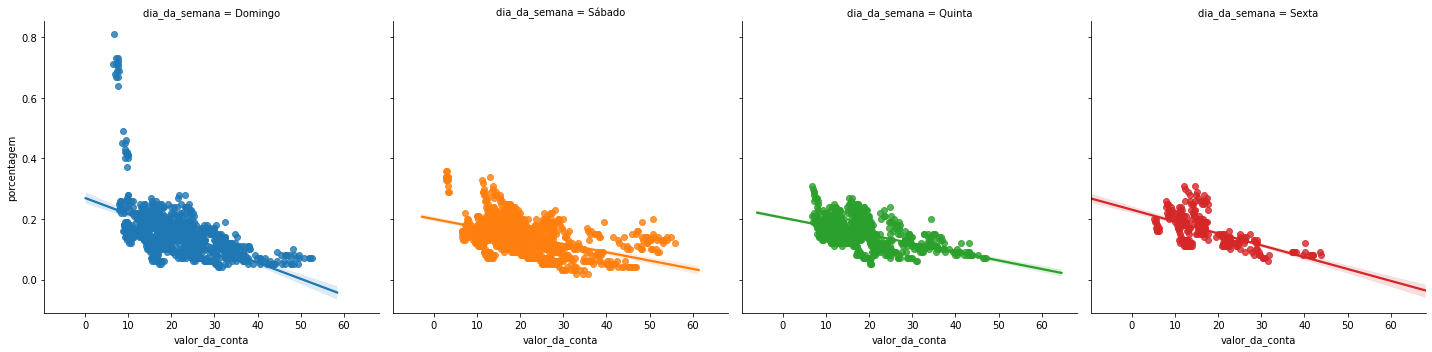

In [60]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

Assim, perceberemos melhor as diferenças entre os dias, constatando algumas observações; todas as porcentagens caem conforme o valor da conta sobe, e percebemos maiores distinções entre o domingo e o sábado.

Agora que já realizamos várias análises visuais gerando alguns gráficos, faremos análises descritivas em relação ao valor da conta, porcentagem, média de gorjetas e etc.

Começaremos exibindo a média geral das gorjetas escrevendo gorjetas.gorjeta.mean(). Para organizar melhor o resultado, atribuiremos este valor à variável media_geral_gorjetas.

In [61]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [62]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.711189214091612


Agora, faremos a média geral dos valores para quinta, sexta, sábado e domingo. Pegaremos primeiro a média de todos os dias com gorjetas.groupby(), recebendo a especificação de 'dia_da_semana' entre colchetes. Em seguida, aplicamos a média mean().

In [63]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.439133,2.902079,0.154953
Quinta,17.724088,2.556177,0.154090
Sexta,17.215616,2.549960,0.163158
Sábado,20.480249,2.690114,0.143604


A média de porcentagem possui o menor valor no sábado, em comparação com os demais dias.

Estamos olhando somente a média dos valores, sem levar em consideração o número de clientes em cada dia. Para saber a frequência desses dias, inserimos gorjetas.dia_da_semana com value_counts().

In [64]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia_da_semana, dtype: int64

Assim poderemos visualizar a quantidade de pessoas que foram ao restaurante nos quatro dias. O sábado é o dia mais frequentado e a sexta-feira é o dia menos frequentado.

Compararemos com a tabela de médias e veremos que a gorjeta é maior para o domingo, o segundo dia mais frequentado. Enquanto o sábado que é o dia mais cheio não possui a maior média de gorjeta.

## Teste de hipótese

Anteriormente, vimos que a média do valor da gorjeta no domingo é maior do que a do sábado. Porém, também observamos que a quantidade de pessoas no restaurante é maior no sábado do que no domingo.

A questão é se os valores das contas nos dois dias são diferentes também.

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no sábado e no domingo**

Nossa hipótese nula busca descobrir se realmente a distribuição do valor da conta é igual no sábado e no domingo. Já a hipótese alternativa é justamente o contrário, e escreveremos suas descrições em células textuais da mesma forma que fizemos anteriormente.

Agora, montaremos a query() que trará o valor da conta de cada um dos dias em questão, como realizamos em nossos testes relacionados a gorjeta. Começaremos com 'Domingo' e guardaremos os valores em uma variável valor_conta_domingo.

In [65]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [66]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [67]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.0004435935681441821


**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no sábado e no domingo**

O resultado de pvalue será 0.35, ou seja, apenas aceitaremos a hipótese alternativa se este número for menor do que 0.05; como é maior, apenas nossa hipótese nula é válida. Isso significa que a distribuição do valor da conta é igual no sábado e no domingo.

Portanto, mesmo que o sábado seja mais frequentado e o domingo possua a maior média de gorjetas, não são diferentes no que diz respeito ao valor da conta.

# Análise 4 - Hora do dia

In [68]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


Falta-nos analisar a hora do dia em relação ao valor da conta e percentual de gorjeta. Neste campo, temos dois períodos diferentes a serem analisados: Almoço e Jantar, visíveis por gorjetas.hora_do_dia.unique().

In [69]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

Aplicaremos tanto análises visuais quanto utilizando ranksums() para os dois grupos em questão. Nosso primeiro gráfico estatístico será categórico cruzando ahora do dia com o valor da conta, ou seja, usaremos catplot() passando x como 'hora_do_dia' e y como 'valor_da_conta'.

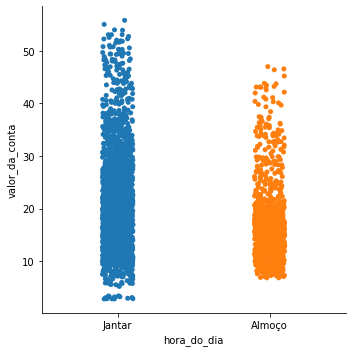

In [70]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Aparentemente, o jantar é o momento do dia com os maiores valores de conta. Perceberemos que existem alguns pontos com quantias muito parecidas, e poderemos aplicar um parâmetro que nos permitirá visualizar melhor todos os pontos separadamente.

Copiaremos a última sentença de código e colaremos na célula seguinte, passando um quarto parâmetro kind sendo igual a 'swarm'.

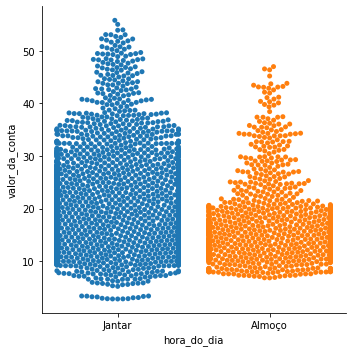

In [71]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm',data=gorjetas)

Desta forma, conseguiremos visualizar melhor cada um dos pontos do gráfico.

Geraremos um outro gráfico interessante por meio de violinplot(), sendo justamente a tradução de "violino" para o inglês.

Como parâmetro, passaremos x sendo a 'hora_do_dia', y como 'valor_da_conta' e data=gorjetas.

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

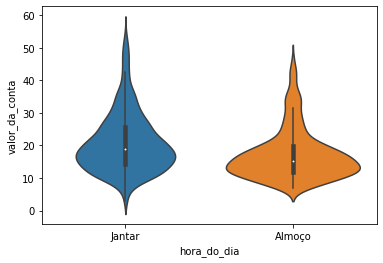

In [72]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Neste gráfico, conseguiremos ver que há um grupo bem grande com valor da conta próximo de 20 no jantar, e outro maior ainda por volta dos 15 na hora do almoço.

Em seguida, visualizaremos os dois grupos lado a lado, analisando a média dos valores para cada horário do dia.

Este novo gráfico utilizará o comando boxplot() recebendo os mesmos valores nos eixos anteriores.

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

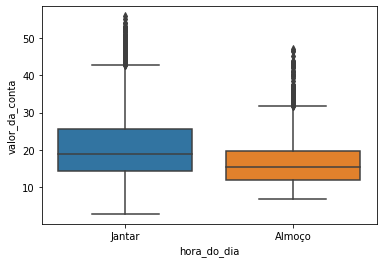

In [73]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

Desta forma, poderemos ver mais claramente que a mediana dos valores da conta no horário do jantar é diferente da mediana do almoço.

Outro gráfico bastante conhecido e tradicional que utilizaremos em nossa análise é o histograma por meio de distplot(). Para que funcione, precisaremos pegar os valores da conta de todas as pessoas que almoçaram no restaurante através de uma query().

Passaremos como parâmetro hora_do_dia sendo == a 'Almoço' entre aspas. Por fim, aplicaremos valor_da_conta e armazenaremos em uma nova variável almoco.

In [74]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

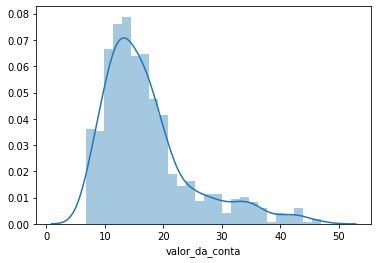

In [75]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

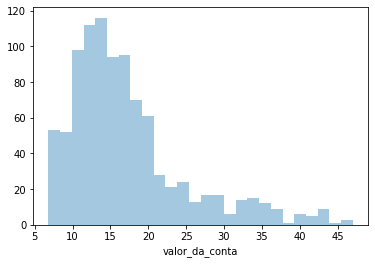

In [76]:
sns.distplot(almoco, kde=False)

Neste gráfico, vemos uma grande faixa entre os valores $10 e $15. Faremos o mesmo processo para o jantar.

In [77]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta'>

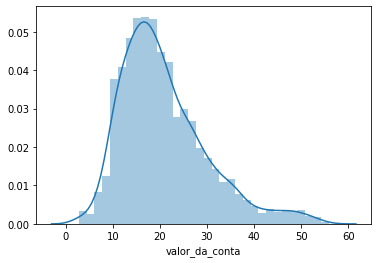

In [78]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

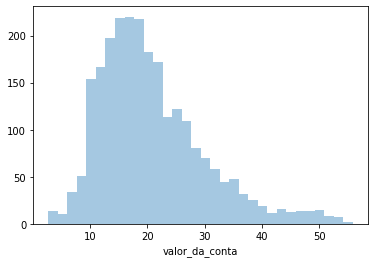

In [79]:
sns.distplot(jantar, kde=False)

Com esses gráficos gerados, poderemos ver que são bastante diferentes.

## Teste de hipótese

Nesta última etapa, faremos algumas análises em relação a hora do dia.

Já geramos alguns gráficos, mas queremos uma descrição estatística com números do que estamos visualizando. Nossa análise será para saber se a hora do dia tem influência sobre o valor da conta.

Poderemos tirar uma média desses valores utilizando o groupby([]). Dentro dos colchetes, passaremos o grupo 'hora_do_dia e mean() ao final.

In [80]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


Com isso, poderemos ver que a média do valor da conta e da gorjeta no almoço são menores em relação ao jantar. A mesma coisa acontece com a porcentagem.

Aplicaremos ranksums() para teste de hipóteses, descobrindo se, de fato, a distribuição do valor da conta é diferente entre os dois grupos em questão.

**H<sup>null</sup>**

> **A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

In [81]:
r2 = ranksums(jantar, almoco)

In [82]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 5.169201062207143e-34


**H<sup>alt</sup>**

> **A distribuição do valor da conta não é igual no jantar e no almoço**

O sistema retorna um pvalue menor do que 0.05, o que significará que a distribuição é diferente nos dois períodos do dia e que a hipótese nula poderá ser rejeitada.

## Teste de hipótese 2

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

Faremos um teste com pvalue relacionado à porcentagem que possui uma média bastante parecida para as duas horas do dia, verificando se são grupos diferentes de fato ou não.

Chamaremos gorjetas passando query() para sabermos se a hora_do_dia é == a 'Almoço' entre aspas, seguido de porcentagem.

Após executar e receber os valores, armazenaremos em uma variável porcentagem_almoco

In [83]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

Aplicaremos a mesma metodologia para o jantar em uma nova variável porcentagem_jantar.



In [84]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [85]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [86]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 1.3785725618355523e-11


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é igual no jantar e no almoço**

O valor do pvalue é superior a 0.05, o que significará que temos grupos parecidos. Ou seja, a distribuição da taxa da gorjeta é igual de fato no almoço e no jantar.